# Nullable Reference Types

* Off by default, opt-in. If turned on, a reference is assumed to be not null
* Non-nullability by default is a radical change, should be enabled explicitly
* The compiler infers null possibility as best as it could: flow analysis
* It doesn't guarantee the prevention of all NRE, it just gonna find most of them at design time
* It gives a fine-grained control over nullability
* Allows to find bugs related to NRE from runtime to design/compile time
* Annotations that extends type system. Uses `[NullableAttribute(flags)]` to decorate all members
* Not really useful until all parties embrace non-nullability by default


## Nullable context

* Nullable enabled globabbly 
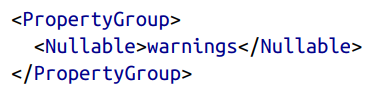
* `#nullable enable` per-file

* Nullable annotation context
* Nullable warning context


## Embrace nullability

* C# team try to get "nullified" before .NET 5 release. 
* nullable adoption phase


## Demo

`samples\scripts\nullable-rerence-types.csx`


In [ ]:
#nullable enable
// #nullable enable warnings
// #nullable enable annotations


string? mayBeNull;

if(mayBeNull != null)
{
    display(mayBeNull.Length);
}else
{
   display(mayBeNull.Length);  // ! null-forgiving operator (aka bang operator)
}

display(mayBeNull?.Length ?? 0);


# Migration strategy

1. Enable nullable globally and see how many erros you've got; probably a lot
2. Surround a block of code that you want to migrate like this and clarify design intent:

```csharp
#nullable enable
public class Person
{
    public string FirstName { get; set; }
    public string MiddleName { get; set; }
    public string LastName { get; set; }
}
#nullable restore
```
3. Add annotations and attributes
4. Move to 100% coverage, nullable al the way! 

## Libraries. Communicate nullable rules to callers

* The question is: "How to communicate non-nullable type design intent across libraries?"
* And the answer is **Attributes**
* `AllowNull`, `DisallowNull`, `MaybeNull`, `NotNull`, `NotNullWhen`, `MaybeNullWhen`, and `NotNullIfNotNull`

In [1]:
using System.Diagnostics.CodeAnalysis;
#nullable enable

if(TryGetName(out var name))
{
    display(name.Length);
}

display(name.Length); // this is danger zone


bool TryGetName([NotNullWhen(true)] out string? name)
{
    name = "Doe";
    return true;
}

The below script needs to be able to find the current output cell; this is an easy method to get it.

3

3


(9,9): warning CS8602: Dereference of a possibly null reference.



[sharplab-demo-nullable-reference-types](https://sharplab.io/#v2:EYLgtghgzgLgpgJwDQxAgrgOyQExAagB8ABAJgEYBYAKGIAYACY8gOgBEBLCAc0wHtYHAMZQWAYT444AQUwQANgE8oHKAG4aAYkzp58iMHlwGcOYbg1iAZiakGYhgG8aDV7bvPqb7wwBCAfgBtAF0GCAQEBgBeBgBxOBhpCIAKTDgAdwY+YAArOCEYZIBKIo0vH1cOADNk8IRAulDVBgA3cIYAB0QoPkwilwqnAcG3ZgBOZIASACJHLoQezABfadLhnyX1zfLXdcDiAHYQBgA5PhgT3XkASSqzi6vk6f54MA6YRVXg9Y6EDjb4ExyAA2PxBYL+OIJJIIZLZPIFSEvOBvD5FaIAPgY628yNRigYzReDB0ehxbiRGTBIScaUyxScADEOAsLhAwMYYtNGXw+NMkAwADLQNkcqLTXzhaZLAWk+RLbE7HzHOVlbaWGwIfJ8BA4PyKzzeaxAxjM1kndnGRwMbgJNQMKB2hgKmLMOgsACi+LKRpsbshAFkODgcEYLRynLaYPbHdHnetjW6hSLw1abU7Y/aXSbPd6aEsgA==)

TODO: change `new object()` to `null` and see what happens.

```csharp
#nullable enable

using System;
using System.Diagnostics.CodeAnalysis;

public class C {
    public static void Main() {
        B?[] arr = GetArr(new object());
        if(arr[0] is var person)
        {
            Console.WriteLine($"{person}");
        }
    }
    
    [return: NotNullIfNotNull("notempty")]
    private static B?[]? GetArr(object? notempty) => 
        notempty is not null
        ? new B?[] {new () {FirstName = "Foo", LastName="Bar"}, null} 
        : null;
}

public record B 
{
    public string FirstName { get; set; } = string.Empty;
    public string? MiddleName {get; set; }
    public string LastName { get; set; } = string.Empty;
}
```

# Reference

* https://docs.microsoft.com/en-us/dotnet/csharp/nullable-references
* https://docs.microsoft.com/en-us/dotnet/csharp/nullable-migration-strategies
* https://docs.microsoft.com/en-us/dotnet/csharp/tutorials/upgrade-to-nullable-references
* https://www.youtube.com/watch?v=vSwP-jk73F4&ab_channel=DotNext
* https://www.youtube.com/watch?v=VdC0aoa7ung&ab_channel=MicrosoftVisualStudio
* https://www.youtube.com/watch?v=TJiLhRPgyq4&ab_channel=MicrosoftVisualStudio
* https://www.youtube.com/watch?v=2oXTXcmyJgI&ab_channel=DotNext
* https://www.youtube.com/watch?v=NDweaZZZcbc&feature=emb_logo&ab_channel=FilipEkberg
* https://gist.github.com/richlander/e3c0031e226ee06481668867955b82de